In [2]:
import requests
from bs4 import BeautifulSoup as Bs
import pandas as pd

In [3]:
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")

In [4]:
soup = Bs(req.text,"html.parser")

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Harvard University - Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":742475609,"wgRevisionId":742475609,"wgArticleId":18426501,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from September 2014","All articles containing potentially dated statements","Articles with Wayback Machine links","Wikipedia indefinitely move-protected pages","Use mdy dates from September 2015","Wikipedia pages

In [7]:
 table = str(soup.find("table",{"class":"wikitable"}))

In [10]:
from IPython.core.display import HTML

In [11]:
HTML(table)

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17%,11%,5%
Black/Non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed Race/Other,10%,8%,9%
International students,11%,27%,N/A


In [21]:
rows = [row for row in soup.find("table", "wikitable").find_all("tr")]
rows

[<tr>
 <th></th>
 <th>Undergraduate</th>
 <th>Graduate<br/>
 and Professional</th>
 <th>U.S. Census</th>
 </tr>, <tr>
 <th>Asian/Pacific Islander</th>
 <td>17%</td>
 <td>11%</td>
 <td>5%</td>
 </tr>, <tr>
 <th>Black/Non-Hispanic</th>
 <td>6%</td>
 <td>4%</td>
 <td>12%</td>
 </tr>, <tr>
 <th>Hispanics of any race</th>
 <td>9%</td>
 <td>5%</td>
 <td>16%</td>
 </tr>, <tr>
 <th>White/non-Hispanic</th>
 <td>46%</td>
 <td>43%</td>
 <td>64%</td>
 </tr>, <tr>
 <th>Mixed Race/Other</th>
 <td>10%</td>
 <td>8%</td>
 <td>9%</td>
 </tr>, <tr>
 <th>International students</th>
 <td>11%</td>
 <td>27%</td>
 <td>N/A</td>
 </tr>]

In [15]:
rem_nl = lambda s: s.replace("\n"," ")

In [17]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()]
columns

['Undergraduate', 'Graduate and Professional', 'U.S. Census']

In [22]:
indexes = [row.find('th').get_text() for row in rows[1:]]

In [33]:
to_num = lambda x: x[-1] == "%" and int(x[:-1]) or None

In [34]:
values = [to_num(value.get_text())  for row in rows[1:] for value in row.find_all("td")]

In [35]:
values

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]

In [45]:
stacked = zip(*[values[i::3] for i in range(len(columns))])

In [49]:
stacked_values = list(zip(*[values[i::3] for i in range(len(columns))]))

In [50]:
stacked_values

[(17, 11, 5), (6, 4, 12), (9, 5, 16), (46, 43, 64), (10, 8, 9), (11, 27, None)]

In [51]:
indexes

['Asian/Pacific Islander',
 'Black/Non-Hispanic',
 'Hispanics of any race',
 'White/non-Hispanic',
 'Mixed Race/Other',
 'International students']

In [52]:
df = pd.DataFrame(stacked_values,columns=columns,index=indexes)

In [53]:
df

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5
Black/Non-Hispanic,6,4,12
Hispanics of any race,9,5,16
White/non-Hispanic,46,43,64
Mixed Race/Other,10,8,9
International students,11,27,NaN


In [54]:
df.dtypes

Undergraduate                  int64
Graduate and Professional      int64
U.S. Census                  float64
dtype: object

In [55]:
df_clean = df.fillna(0).astype(int)

In [58]:
df_clean.dtypes

Undergraduate                int64
Graduate and Professional    int64
U.S. Census                  int64
dtype: object

In [59]:
df_clean.describe()

,Undergraduate,Graduate and Professional,U.S. Census
count,6.000000,6.000000,6.000000
mean,16.500000,16.333333,17.666667
std,14.896308,15.513435,23.363790
min,6.000000,4.000000,0.000000
25%,9.250000,5.750000,6.000000
50%,10.500000,9.500000,10.500000
75%,15.500000,23.000000,15.000000
max,46.000000,43.000000,64.000000


In [73]:
df_clean = df.fillna(0).astype(int)

In [74]:
df_clean

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17,11,5
Black/Non-Hispanic,6,4,12
Hispanics of any race,9,5,16
White/non-Hispanic,46,43,64
Mixed Race/Other,10,8,9
International students,11,27,0


In [75]:
df_clean.values

array([[17, 11,  5],
       [ 6,  4, 12],
       [ 9,  5, 16],
       [46, 43, 64],
       [10,  8,  9],
       [11, 27,  0]])

In [76]:
df_clean["Undergraduate"]

Asian/Pacific Islander    17
Black/Non-Hispanic         6
Hispanics of any race      9
White/non-Hispanic        46
Mixed Race/Other          10
International students    11
Name: Undergraduate, dtype: int64

In [77]:
df_clean.Undergraduate

Asian/Pacific Islander    17
Black/Non-Hispanic         6
Hispanics of any race      9
White/non-Hispanic        46
Mixed Race/Other          10
International students    11
Name: Undergraduate, dtype: int64

In [78]:
df_clean.stack()

Asian/Pacific Islander  Undergraduate                17
                        Graduate and Professional    11
                        U.S. Census                   5
Black/Non-Hispanic      Undergraduate                 6
                        Graduate and Professional     4
                        U.S. Census                  12
Hispanics of any race   Undergraduate                 9
                        Graduate and Professional     5
                        U.S. Census                  16
White/non-Hispanic      Undergraduate                46
                        Graduate and Professional    43
                        U.S. Census                  64
Mixed Race/Other        Undergraduate                10
                        Graduate and Professional     8
                        U.S. Census                   9
International students  Undergraduate                11
                        Graduate and Professional    27
                        U.S. Census             

In [82]:
df_flat=df_clean.stack().reset_index()
df_flat.columns = ["race","source","percentage"]

In [83]:
df_flat

,race,source,percentage
0,Asian/Pacific Islander,Undergraduate,17
1,Asian/Pacific Islander,Graduate and Professional,11
2,Asian/Pacific Islander,U.S. Census,5
3,Black/Non-Hispanic,Undergraduate,6
4,Black/Non-Hispanic,Graduate and Professional,4
5,Black/Non-Hispanic,U.S. Census,12
6,Hispanics of any race,Undergraduate,9
7,Hispanics of any race,Graduate and Professional,5
8,Hispanics of any race,U.S. Census,16
9,White/non-Hispanic,Undergraduate,46


In [85]:
grouped=df_flat.groupby("race")

In [86]:
grouped.groups

{'Asian/Pacific Islander': [0, 1, 2],
 'Black/Non-Hispanic': [3, 4, 5],
 'Hispanics of any race': [6, 7, 8],
 'International students': [15, 16, 17],
 'Mixed Race/Other': [12, 13, 14],
 'White/non-Hispanic': [9, 10, 11]}

In [89]:
mean_percs=grouped.mean()

In [88]:
%matplotlib inline

In [90]:
type(mean_percs)

pandas.core.frame.DataFrame

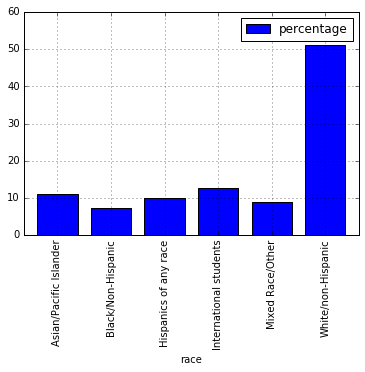

In [92]:
mean_percs.plot(kind="bar")